In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

file_path = r'C:\Users\EugênioLenineGueiros\Documents\PosTechDataScience_Fiap\05_Deep_Learning\arquivos\PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

# Analisando os dados 🔎

In [48]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

In [49]:
#Ajustando configurações para permitir a visualização de todas as colunas

pd.set_option('display.max_columns', None)

# Funções reutilizáveis 🤓

In [50]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [51]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [52]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [53]:
passos_magicos_22 = filter_columns(df, ['2020', '2021'])
passos_magicos_22 = cleaning_dataset(passos_magicos_22)
passos_magicos_22.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)


In [54]:
passos_magicos_22.columns

Index(['NOME', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

In [55]:
passos_magicos_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 862 non-null    object 
 1   FASE_2022            862 non-null    float64
 2   TURMA_2022           862 non-null    object 
 3   ANO_INGRESSO_2022    862 non-null    float64
 4   BOLSISTA_2022        862 non-null    object 
 5   INDE_2022            862 non-null    float64
 6   CG_2022              862 non-null    float64
 7   CF_2022              862 non-null    float64
 8   CT_2022              862 non-null    float64
 9   PEDRA_2022           862 non-null    object 
 10  DESTAQUE_IEG_2022    862 non-null    object 
 11  DESTAQUE_IDA_2022    862 non-null    object 
 12  DESTAQUE_IPV_2022    862 non-null    object 
 13  IAA_2022             862 non-null    float64
 14  IEG_2022             862 non-null    float64
 15  IPS_2022             862 non-null    float64

In [56]:
def dummie_int(df, list_columns):
    _df = df.copy()
    for columns in list_columns:
        _df[columns] = _df[columns].replace(['Sim', 'Não'], [1,0])
    return _df

In [57]:
passos_magicos_22

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.500,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.500,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,ALUNO-1342,2.0,K,2022.0,Não,8.150001,99.0,13.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.500,7.750000,6.000000,9.500000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano)
1342,ALUNO-1343,2.0,K,2018.0,Não,5.674644,763.0,141.0,11.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.41668,6.470435,6.250,2.000000,2.000000,2.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.444443,5.0,Fase 4 (9º ano)
1345,ALUNO-1346,0.0,U,2022.0,Não,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,9.166667,8.833333,NaN,2.0,5.625000,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Sim,9.083340,5.0,Fase 1 (4º ano)
1347,ALUNO-1348,4.0,P,2018.0,Sim,6.749981,567.0,51.0,6.0,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,4.666667,7.166667,5.866667,4.0,6.718750,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,Não,Não,5.833328,5.0,Fase 5 (1º EM)


In [35]:
passos_magicos_22 = dummie_int(passos_magicos_22, ['BOLSISTA_2022', 'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022'])
passos_magicos_22


,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,0,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.500,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,1,0,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,0,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.500,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,0,0,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,0,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.500,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,0,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.500,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,0,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.500,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,0,0,7.916670,5.0,Fase 2 (5º e 6º ano)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341,ALUNO-1342,2.0,K,2022.0,0,8.150001,99.0,13.0,1.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,7.91668,9.666667,7.500,7.750000,6.000000,9.500000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.500000,10.0,Fase 2 (5º e 6º ano)
1342,ALUNO-1343,2.0,K,2018.0,0,5.674644,763.0,141.0,11.0,Quartzo,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,7.41668,6.470435,6.250,2.000000,2.000000,2.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.444443,5.0,Fase 4 (9º ano)
1345,ALUNO-1346,0.0,U,2022.0,0,8.135538,105.0,30.0,2.0,Topázio,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,9.00002,9.031839,7.500,9.000000,9.166667,8.833333,NaN,2.0,5.625000,Promovido de Fase,Promovido de Fase,NaN,NaN,0,1,9.083340,5.0,Fase 1 (4º ano)
1347,ALUNO-1348,4.0,P,2018.0,1,6.749981,567.0,51.0,6.0,Ágata,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,8.33334,9.178030,5.625,5.900000,4.666667,7.166667,5.866667,4.0,6.718750,Mantido na Fase atual,Mantido na Fase atual,Promovido de Fase,Promovido de Fase,0,0,5.833328,5.0,Fase 5 (1º EM)


In [12]:
#Ajustando colunas (transformando em dummy)

passos_magicos_22['BOLSISTA_2022'] = passos_magicos_22['BOLSISTA_2022'].replace(['Sim', 'Não'], [1,0])
passos_magicos_22['INDICADO_BOLSA_2022'] = passos_magicos_22['INDICADO_BOLSA_2022'].replace(['Sim', 'Não'], [1,0])
passos_magicos_22['PONTO_VIRADA_2022'] = passos_magicos_22['PONTO_VIRADA_2022'].replace(['Sim', 'Não'], [1,0])


C:\Users\EugênioLenineGueiros\AppData\Local\Temp\ipykernel_22888\1841872301.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  passos_magicos_22['BOLSISTA_2022'] = passos_magicos_22['BOLSISTA_2022'].replace(['Sim', 'Não'], [1,0])
C:\Users\EugênioLenineGueiros\AppData\Local\Temp\ipykernel_22888\1841872301.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  passos_magicos_22['INDICADO_BOLSA_2022'] = passos_magicos_22['INDICADO_BOLSA_2022'].replace(['Sim', 'Não'], [1,0])
C:\Users\EugênioLenineGueiros\AppData\Local\Temp\ipykernel_228

In [13]:
passos_magicos_22.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,ALUNO-2,0.0,K,2022.0,0,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,1,0,7.916665,5.0,Fase 2 (5º e 6º ano)
3,ALUNO-4,2.0,J,2022.0,0,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,0,0,8.055553,5.0,Fase 3 (7º e 8º ano)
4,ALUNO-5,2.0,L,2019.0,0,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.833337,5.0,Fase 3 (7º e 8º ano)
5,ALUNO-6,2.0,K,2022.0,0,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,0,0,7.500000,10.0,Fase 2 (5º e 6º ano)
6,ALUNO-7,1.0,U,2022.0,0,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,0,0,7.916670,5.0,Fase 2 (5º e 6º ano)


In [14]:
passos_magicos_22['PEDRA_2022'].unique()

array(['Ametista', 'Quartzo', 'Topázio', 'Ágata'], dtype=object)

In [15]:
passos_magicos_22['DESTAQUE_IEG_2022'].unique()

array(['Destaque: A sua boa entrega das lições de casa.',
       'Melhorar: Melhorar a sua entrega de lições de casa.'],
      dtype=object)

In [16]:
passos_magicos_22['DESTAQUE_IDA_2022'].unique()

array(['Destaque: As suas boas notas na Passos Mágicos.',
       'Melhorar: Empenhar-se mais nas aulas e avaliações.'], dtype=object)

In [17]:
passos_magicos_22['DESTAQUE_IPV_2022'].unique()

array(['Destaque: A sua boa integração aos Princípios Passos Mágicos.',
       'Melhorar: Integrar-se mais aos Princípios Passos Mágicos.'],
      dtype=object)

In [18]:
passos_magicos_22['REC_AVA_1_2022'].unique()

array(['Mantido na Fase + Bolsa', 'Promovido de Fase',
       'Mantido na Fase atual', 'Promovido de Fase + Bolsa',
       'Não avaliado', 'Alocado em Fase anterior'], dtype=object)

In [19]:
passos_magicos_22['REC_AVA_2_2022'].unique()

array(['Mantido na Fase atual', 'Promovido de Fase', 'Não avaliado',
       'Promovido de Fase + Bolsa', 'Mantido na Fase + Bolsa'],
      dtype=object)

In [20]:
passos_magicos_22['REC_AVA_3_2022'].unique()

array([nan, 'Promovido de Fase', 'Mantido na Fase atual',
       'Promovido de Fase + Bolsa', 'Mantido na Fase + Bolsa',
       'Alocado em Fase anterior'], dtype=object)

In [21]:
passos_magicos_22['REC_AVA_4_2022'].unique()

array([nan, 'Promovido de Fase', 'Promovido de Fase + Bolsa',
       'Mantido na Fase atual', 'Mantido na Fase + Bolsa',
       'Alocado em Fase anterior'], dtype=object)

In [22]:
passos_magicos_22['NIVEL_IDEAL_2022'].unique()

array(['Fase 2 (5º e 6º ano)', 'Fase 3 (7º e 8º ano)', 'Fase 6 (2º EM)',
       'ALFA  (2º e 3º ano)', 'Fase 1 (4º ano)', 'Fase 4 (9º ano)',
       'Fase 8 (Universitários)', 'Fase 5 (1º EM)', 'Fase 7 (3º EM)'],
      dtype=object)

In [23]:
drop_columns = ['DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022', 'REC_AVA_1_2022',
                'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022', 'NIVEL_IDEAL_2022', 'NOME', 'FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022']

In [24]:
passos_magicos_22.drop(columns=drop_columns, inplace=True)


In [25]:
passos_magicos_22.head()

,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022
1,0,7.675509,245.0,66.0,6.0,Ametista,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,1,0,7.916665,5.0
3,0,7.117065,451.0,69.0,3.0,Ametista,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,0,0,8.055553,5.0
4,0,7.232336,415.0,61.0,12.0,Ametista,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,0,0,7.833337,5.0
5,0,7.741669,221.0,35.0,2.0,Ametista,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,0,0,7.500000,10.0
6,0,7.406743,357.0,93.0,7.0,Ametista,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,0,0,7.916670,5.0


In [26]:
passos_magicos_22 = pd.get_dummies(passos_magicos_22, columns=['PEDRA_2022'], dtype=int)

In [27]:
passos_magicos_22.head()

,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,PEDRA_2022_Ametista,PEDRA_2022_Quartzo,PEDRA_2022_Topázio,PEDRA_2022_Ágata
1,0,7.675509,245.0,66.0,6.0,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,1,0,7.916665,5.0,1,0,0,0
3,0,7.117065,451.0,69.0,3.0,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,0,0,8.055553,5.0,1,0,0,0
4,0,7.232336,415.0,61.0,12.0,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,0,0,7.833337,5.0,1,0,0,0
5,0,7.741669,221.0,35.0,2.0,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,0,0,7.500000,10.0,1,0,0,0
6,0,7.406743,357.0,93.0,7.0,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,0,0,7.916670,5.0,1,0,0,0


In [28]:
passos_magicos_22.rename(columns={
    'PEDRA_2022_Ametista':'Ametista',
    'PEDRA_2022_Quartzo':'Quartzo',
    'PEDRA_2022_Topázio':'Topazio',
    'PEDRA_2022_Ágata':'Agata'
}, inplace = True)

In [29]:
passos_magicos_22.head()

,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,Ametista,Quartzo,Topazio,Agata
1,0,7.675509,245.0,66.0,6.0,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,1,0,7.916665,5.0,1,0,0,0
3,0,7.117065,451.0,69.0,3.0,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,0,0,8.055553,5.0,1,0,0,0
4,0,7.232336,415.0,61.0,12.0,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,0,0,7.833337,5.0,1,0,0,0
5,0,7.741669,221.0,35.0,2.0,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,0,0,7.500000,10.0,1,0,0,0
6,0,7.406743,357.0,93.0,7.0,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,0,0,7.916670,5.0,1,0,0,0


In [30]:
passos_magicos_22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BOLSISTA_2022        862 non-null    int64  
 1   INDE_2022            862 non-null    float64
 2   CG_2022              862 non-null    float64
 3   CF_2022              862 non-null    float64
 4   CT_2022              862 non-null    float64
 5   IAA_2022             862 non-null    float64
 6   IEG_2022             862 non-null    float64
 7   IPS_2022             862 non-null    float64
 8   IDA_2022             862 non-null    float64
 9   NOTA_PORT_2022       860 non-null    float64
 10  NOTA_MAT_2022        860 non-null    float64
 11  NOTA_ING_2022        285 non-null    float64
 12  QTD_AVAL_2022        862 non-null    float64
 13  IPP_2022             862 non-null    float64
 14  INDICADO_BOLSA_2022  862 non-null    int64  
 15  PONTO_VIRADA_2022    862 non-null    int64  

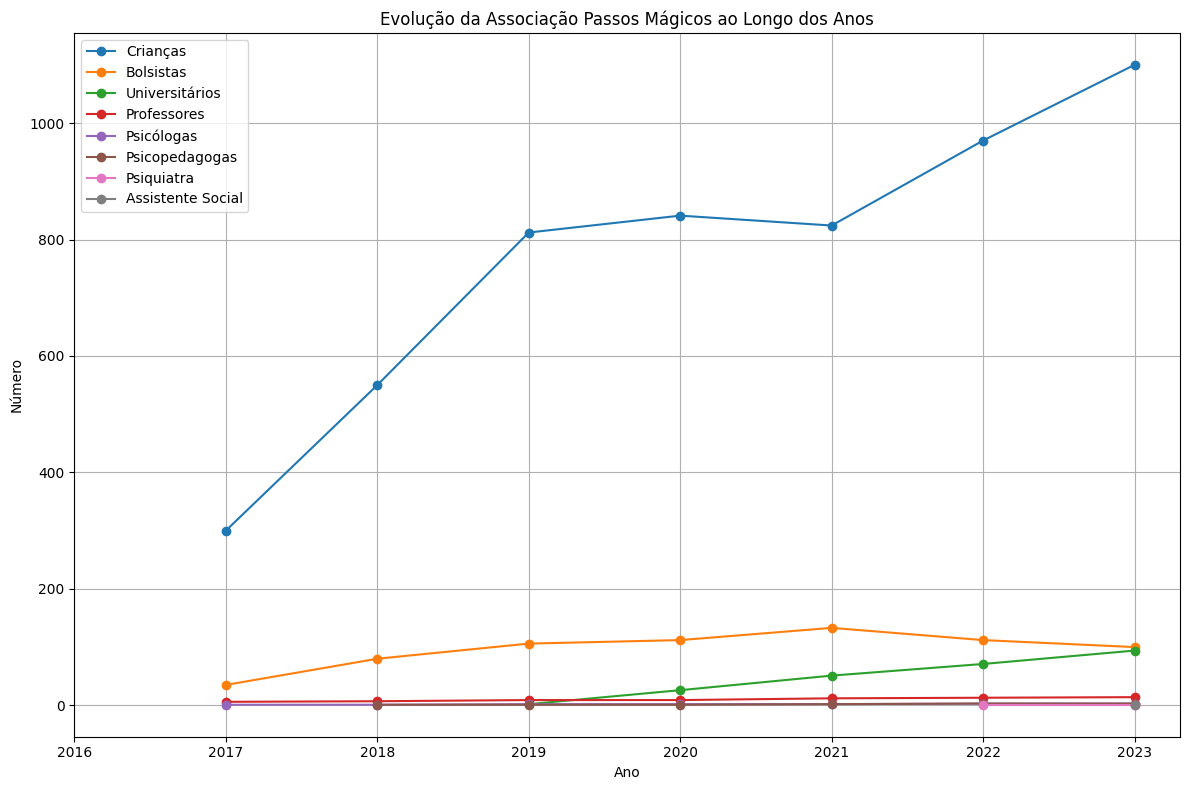

In [2]:
import matplotlib.pyplot as plt

# Dados da evolução da Passos Mágicos ao longo dos anos
anos = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
criancas = [70, 300, 550, 812, 841, 824, 970, 1100]
bolsistas = [26, 35, 80, 106, 112, 133, 112, 100]
universitarios = [None, None, 1, 2, 26, 51, 71, 94]
professores = [5, 6, 7, 9, 9, 12, 13, 14]
psicologas = [1, 1, 1, 2, 2, 2, 3, 3]
psicopedagogas = [None, 1, 1, 1, 1, 2, 3, 3]
psiquiatra = [None, None, None, None, None, 1, 1, 1]
assistente_social = [None, None, None, None, None, None, 1, 1]

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(anos[1:], criancas[1:], marker='o', label='Crianças')
ax.plot(anos[1:], bolsistas[1:], marker='o', label='Bolsistas')
ax.plot(anos[3:], universitarios[3:], marker='o', label='Universitários')
ax.plot(anos[1:], professores[1:], marker='o', label='Professores')
ax.plot(anos[1:], psicologas[1:], marker='o', label='Psicólogas')
ax.plot(anos[2:], psicopedagogas[2:], marker='o', label='Psicopedagogas')
ax.plot(anos[6:], psiquiatra[6:], marker='o', label='Psiquiatra')
ax.plot(anos[7:], assistente_social[7:], marker='o', label='Assistente Social')

# Configurações do gráfico
ax.set_title('Evolução da Associação Passos Mágicos ao Longo dos Anos')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')
ax.legend()
ax.grid(True)

# Mostrar o gráfico
plt.xticks(anos)
plt.tight_layout()
plt.show()